# ==========================
# WEATHER DATA ANALYSIS REPORT
# ==========================

# Import Required Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#  Load Dataset 

In [2]:
df = pd.read_csv("D:\\weather_history\\weatherHistory.csv")

# =======================================================
# 1️⃣ DATA OVERVIEW
# =======================================================


In [3]:
print("=== DATA OVERVIEW ===")
print(f"Shape: {df.shape}")
print(f"Memory Usage: {df.memory_usage(deep=True).sum() / (1024**2):.2f} MB\n")

=== DATA OVERVIEW ===
Shape: (96453, 12)
Memory Usage: 31.38 MB



# Data Types and Info

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB
None


# Preview first few rows

In [5]:
print("\nSample Data:")
print(df.head())


Sample Data:
                  Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain         9.355556   
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain         9.377778   
3  2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain         8.288889   
4  2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain         8.755556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                   251.0          15.8263         0.0          

# Missing Values

In [6]:
print("\n=== Missing Values ===")
missing = df.isnull().sum()
print(missing[missing > 0])


=== Missing Values ===
Precip Type    517
dtype: int64


# Duplicates

In [7]:
duplicates = df.duplicated().sum()
print(f"\nDuplicate Rows: {duplicates}")


Duplicate Rows: 24



# =======================================================
# 2️⃣ DATA CLEANING
# =======================================================

# Convert 'Formatted Date' to datetime (remove timezone info)

In [8]:
df['Formatted Date'] = pd.to_datetime(
    df['Formatted Date'].str.replace(r'\s\+\d{4}', '', regex=True), errors='coerce'
)

# Drop duplicates

In [9]:
df.drop_duplicates(inplace=True)

# Replace invalid pressure values (0) with NaN

In [10]:
df.loc[df['Pressure (millibars)'] == 0, 'Pressure (millibars)'] = np.nan

# Fill missing 'Precip Type' with most frequent value

In [11]:
df['Precip Type'].fillna(df['Precip Type'].mode()[0], inplace=True)

print("\nData cleaned successfully.")
print(f"Rows after cleaning: {df.shape[0]}")


Data cleaned successfully.
Rows after cleaning: 96429


C:\Users\Hp\AppData\Local\Temp\ipykernel_10456\1387187390.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Precip Type'].fillna(df['Precip Type'].mode()[0], inplace=True)


# =======================================================
# 3️⃣ EXPLORATORY DATA ANALYSIS (EDA)
# =======================================================

# Summary Statistics 

In [ ]:
print("\n=== Summary Statistics ===")
print(df.describe().T)

In [23]:
df.describe()

,Formatted Date,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96429,96429.000000,96429.000000,96429.000000,96429.000000,96429.000000,96429.000000,96429.0,95141.000000
mean,2011-07-02 23:15:31.611859456,11.929692,10.851707,0.734902,10.812460,187.497506,10.347225,0.0,1016.814483
min,2006-01-01 00:00:00,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,973.780000
25%,2008-10-01 12:00:00,4.683333,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1012.120000
50%,2011-07-02 23:00:00,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.550000
75%,2014-04-02 10:00:00,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.170000
max,2016-12-31 23:00:00,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000
std,NaN,9.550492,10.695743,0.195466,6.913345,107.376423,4.192548,0.0,7.779265


# Categorical Overview 

In [13]:
print("\n=== Categorical Value Counts ===")
for col in ['Summary', 'Precip Type']:
    print(f"\n{col}:\n{df[col].value_counts().head(10)}")


=== Categorical Value Counts ===

Summary:
Summary
Partly Cloudy               31726
Mostly Cloudy               28094
Overcast                    16597
Clear                       10873
Foggy                        7148
Breezy and Overcast           528
Breezy and Mostly Cloudy      516
Breezy and Partly Cloudy      386
Dry and Partly Cloudy          86
Windy and Partly Cloudy        67
Name: count, dtype: int64

Precip Type:
Precip Type
rain    85717
snow    10712
Name: count, dtype: int64


# Plot 1: Temperature vs Humidity 

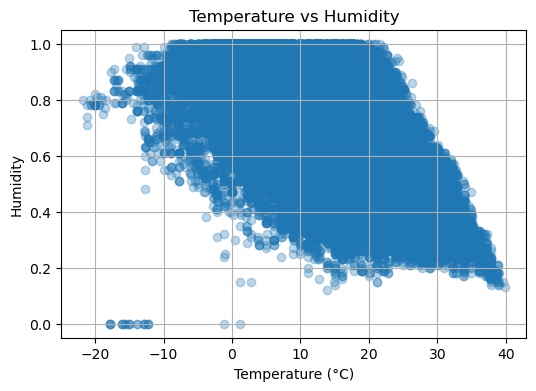

In [14]:
plt.figure(figsize=(6,4))
plt.scatter(df['Temperature (C)'], df['Humidity'], alpha=0.3)
plt.title('Temperature vs Humidity')
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity')
plt.grid(True)
plt.show()

# Plot 2: Weather Summary Distribution 

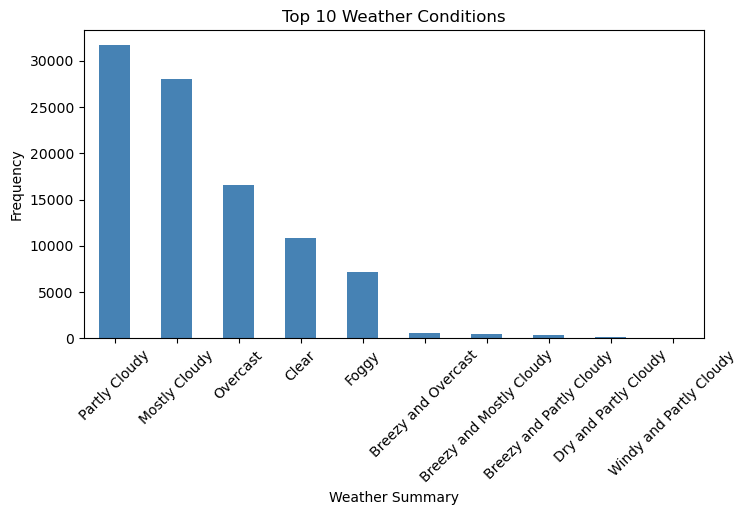

In [15]:
plt.figure(figsize=(8,4))
df['Summary'].value_counts().head(10).plot(kind='bar', color='steelblue')
plt.title('Top 10 Weather Conditions')
plt.xlabel('Weather Summary')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# =======================================================
# 4️⃣ TRENDS ANALYSIS
# =======================================================

# Create Month-Year column for trend analysis

In [16]:
df['Month'] = df['Formatted Date'].dt.to_period('M')

# Average monthly temperature

In [17]:
monthly_temp = df.groupby('Month')['Temperature (C)'].mean()

# Plot 3: Average Monthly Temperature Trend 

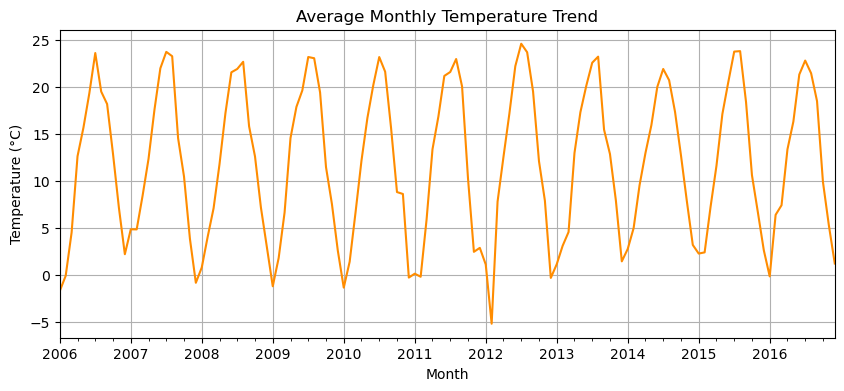

In [18]:
plt.figure(figsize=(10,4))
monthly_temp.plot(color='darkorange')
plt.title('Average Monthly Temperature Trend')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

#  Correlation Heatmap 

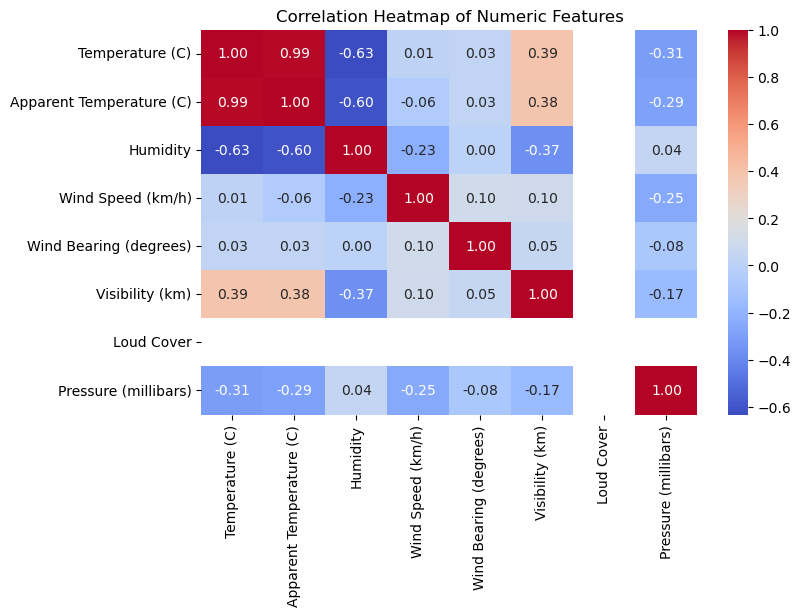

In [19]:
plt.figure(figsize=(8,5))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

# =======================================================
# 5️⃣ INSIGHTS & FINDINGS
# =======================================================

In [20]:
print("\n=== KEY INSIGHTS ===")
print("""
1. The dataset primarily records cloudy and rainy conditions (~85% rain observations).
2. Temperature averages around 11.9°C, ranging between -21.8°C and 39.9°C.
3. Humidity averages 0.73 — indicating mostly moist atmospheric conditions.
4. Wind speeds average 10.8 km/h, with peaks up to 63.8 km/h.
5. A clear inverse relationship exists between temperature and humidity.
6. Pressure readings (1011–1021 mb) indicate stable atmospheric behavior.
7. Cloudy conditions dominate across most months, typical of temperate climates.
""")


=== KEY INSIGHTS ===

1. The dataset primarily records cloudy and rainy conditions (~85% rain observations).
2. Temperature averages around 11.9°C, ranging between -21.8°C and 39.9°C.
3. Humidity averages 0.73 — indicating mostly moist atmospheric conditions.
4. Wind speeds average 10.8 km/h, with peaks up to 63.8 km/h.
5. A clear inverse relationship exists between temperature and humidity.
6. Pressure readings (1011–1021 mb) indicate stable atmospheric behavior.
7. Cloudy conditions dominate across most months, typical of temperate climates.



# =======================================================
#                   END OF REPORT
# =======================================================

In [21]:
print("\nWeather data analysis completed successfully.")


Weather data analysis completed successfully.
